# Ratings Prediction-NLP Project

# Overview:-
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

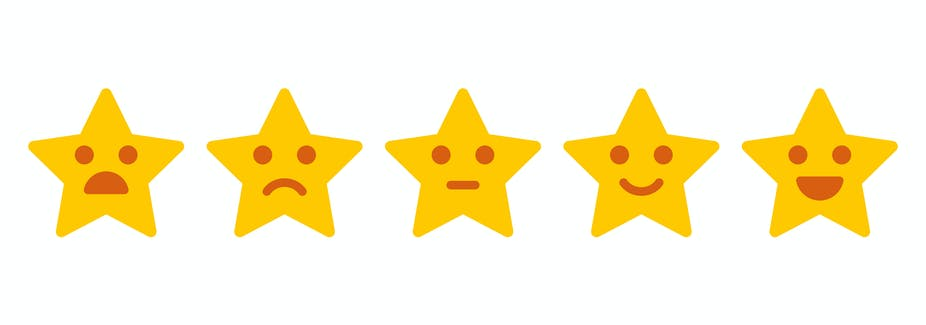

In [2]:
#Rating prediction image
from IPython import display
display.Image("rate.jpg")

# Problem Statement:-
This project contains two phases:-

1- Data Collection Phase:-

We have to scrape at least 20000 rows of data. WE can scrape more data as well, it’s up to you. more the data better the model In this section we need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras,Monitors, Home theater, Router from different e-commerce websites. Basically, we need these columns-

1) reviews of the product.

2) rating of the product.

We can fetch other data as well, if we think data can be useful or can help in the project. It completely depends on our imagination or assumption.

2- Model Building Phase:-

After collecting the data, we need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps like-

Data Cleaning

Exploratory Data Analysis

Data Preprocessing

Model Building

Model Evaluation

Selecting the best model

# Business Goal:-
First we need to collect rating data from different websites using web scraping techniques and then need to build a machine learning model.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
Rating=pd.read_csv('rating_data.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Unnamed: 0.1,Product type,Title,Review,Rating
0,0,0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5 star
1,1,1,Smart Phone,"Super slim and smooth, I'm love in it.","Got it first by prime...smooth and slim, batte...",5 star
2,2,2,Smart Phone,after 1 Day of usage,A day spent on exploring my new device and I w...,5 star
3,3,3,Smart Phone,Very very sleek I didnât expect that slim,I didnât expect this kind of slimness of the...,5 star
4,4,4,Smart Phone,Samsung Top Quality budget phone,Ordered on 2nd Oct. Received on 3rd Oct/Aamzon...,5 star


In [30]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)
Rating.drop('Unnamed: 0.1',axis=1,inplace=True)
Rating.head()

,Product type,Title,Review,Rating
0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5 star
1,Smart Phone,"Super slim and smooth, I'm love in it.","Got it first by prime...smooth and slim, batte...",5 star
2,Smart Phone,after 1 Day of usage,A day spent on exploring my new device and I w...,5 star
3,Smart Phone,Very very sleek I didnât expect that slim,I didnât expect this kind of slimness of the...,5 star
4,Smart Phone,Samsung Top Quality budget phone,Ordered on 2nd Oct. Received on 3rd Oct/Aamzon...,5 star


In [31]:
#Shape of our Dataset after removal of 3 Columns
print("Shape of our dataset is ",Rating.shape)
print("Column count in our dataset is",Rating.shape[1])
print("Row count in our dataset is ",Rating.shape[0])

Shape of our dataset is  (21927, 4)
Column count in our dataset is 4
Row count in our dataset is  21927


In [32]:
#Let's check type of data in our Dataset
Rating.dtypes

Product type    object
Title           object
Review          object
Rating          object
dtype: object

In [33]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",Rating.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(Rating.isna().sum())

Empty cells in Dataset is  True

Columnwise Empty cell analysis

Product type    0
Title           1
Review          1
Rating          0
dtype: int64


In [34]:
Rating.dropna(inplace=True)
Rating.isnull().sum()

Product type    0
Title           0
Review          0
Rating          0
dtype: int64

In [35]:
#Concise Summary of our DataFrame
Rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21926 entries, 0 to 21926
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product type  21926 non-null  object
 1   Title         21926 non-null  object
 2   Review        21926 non-null  object
 3   Rating        21926 non-null  object
dtypes: object(4)
memory usage: 856.5+ KB


In [36]:
#checking rating numbers detail
Rating.Rating.value_counts()

5 star    4960
1 star    4534
4 star    4496
3 star    4117
2 star    3819
Name: Rating, dtype: int64

In [37]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in Rating.columns.values:
    print("\n Unique values in ",column," column is " ,Rating[column].nunique()) 

Column-wise Unique values are as:-

 Unique values in  Product type  column is  8

 Unique values in  Title  column is  12837

 Unique values in  Review  column is  14468

 Unique values in  Rating  column is  5


In [38]:
#Let's check value count of object datatype columns
for col in Rating.columns:
    if Rating[col].dtype=="object":
        print(Rating[col].value_counts())
        print()

Smart watch            3659
Smart Phone            3609
Router                 3292
Home theater           2926
Monitor                2898
Headphones             2415
Laptop                 1753
Professional camera    1374
Name: Product type, dtype: int64

Good                                  221
Value for money                       145
Good product                          128
Average                                52
Nice product                           48
                                     ... 
Issues with connectivity                1
Looks good compared to the sound        1
Worthy                                  1
Nice Product overall. Premium feel      1
99 percent perfect Router               1
Name: Title, Length: 12837, dtype: int64

Good                                                                                                                                                                                                                                          

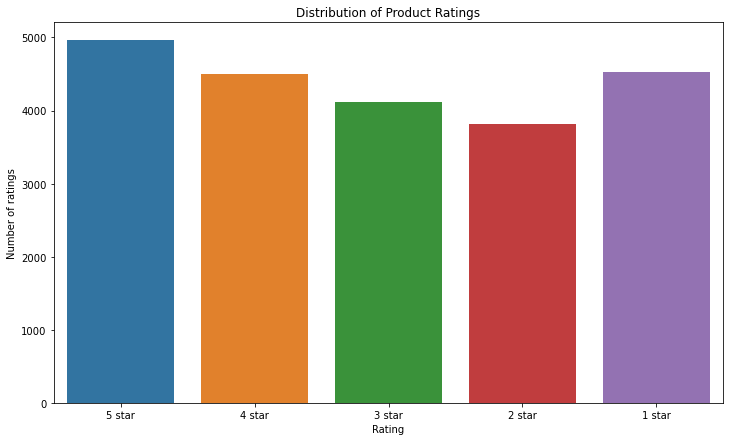

In [39]:
f, axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=Rating['Rating'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.show()

In [40]:
Rating=Rating.sort_values(by='Rating',ascending=False,ignore_index=True)
Rating.head()

,Product type,Title,Review,Rating
0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5 star
1,Smart watch,Superb and amazing product. Just go for it.,I bought noise fit pro for my wife as a bday g...,5 star
2,Smart watch,SMART PURCHASE,Likes\n1. Improved built quality\n2. Amoled d...,5 star
3,Smart watch,satisfied! great band with so many features. w...,Just loving it so far till now. Been a day's t...,5 star
4,Smart watch,"A great, cheap fitness tracker",The device was thinner than I expected it to b...,5 star


In [41]:
#removing star word from Rating column
for i in range(len(Rating["Rating"])):
    Rating["Rating"][i] = int(Rating["Rating"][i].replace(" star",""))

In [42]:
Rating.head()

,Product type,Title,Review,Rating
0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5
1,Smart watch,Superb and amazing product. Just go for it.,I bought noise fit pro for my wife as a bday g...,5
2,Smart watch,SMART PURCHASE,Likes\n1. Improved built quality\n2. Amoled d...,5
3,Smart watch,satisfied! great band with so many features. w...,Just loving it so far till now. Been a day's t...,5
4,Smart watch,"A great, cheap fitness tracker",The device was thinner than I expected it to b...,5


In [43]:
Rating['length']=Rating.Review.str.len()
Rating.head()

,Product type,Title,Review,Rating,length
0,Smart Phone,Best phone but ( Prime member got 1000 loss),"Pros (exellent disply and its very smooth, and...",5,242
1,Smart watch,Superb and amazing product. Just go for it.,I bought noise fit pro for my wife as a bday g...,5,2363
2,Smart watch,SMART PURCHASE,Likes\n1. Improved built quality\n2. Amoled d...,5,777
3,Smart watch,satisfied! great band with so many features. w...,Just loving it so far till now. Been a day's t...,5,1436
4,Smart watch,"A great, cheap fitness tracker",The device was thinner than I expected it to b...,5,888


<AxesSubplot:>

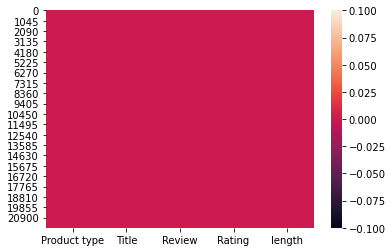

In [44]:
#To check missing values using Seaborn Heatmap
sns.heatmap(Rating.isnull())

Observation:

Dataset has no missing values.

In [45]:
#importing NLP libraries
import re
import nltk
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [46]:
#convert text to lowercase
Rating['Review']=Rating['Review'].str.lower()

In [47]:
Rating['Review']=Rating['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Review']=Rating['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Review']=Rating['Review'].str.replace(r'£|\$', 'dollers')

Rating['Review']=Rating['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Review']=Rating['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [48]:
#remove punctuation
Rating['Review']=Rating['Review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rating['Review']=Rating['Review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rating['Review']=Rating['Review'].str.replace(r'^\s+|\s+?$', '')

In [49]:
Rating.head()

,Product type,Title,Review,Rating,length
0,Smart Phone,Best phone but ( Prime member got 1000 loss),pros exellent disply and its very smooth and s...,5,242
1,Smart watch,Superb and amazing product. Just go for it.,i bought noise fit pro for my wife as a bday g...,5,2363
2,Smart watch,SMART PURCHASE,likes numbr improved built quality numbr amole...,5,777
3,Smart watch,satisfied! great band with so many features. w...,just loving it so far till now been a day s th...,5,1436
4,Smart watch,"A great, cheap fitness tracker",the device was thinner than i expected it to b...,5,888


In [50]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Rating['Review'] = Rating['Review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [52]:
Rating['clean_length'] = Rating.Review.str.len()

In [55]:
Rating.head()

,Product type,Title,Review,Rating,length,clean_length
0,Smart Phone,Best phone but ( Prime member got 1000 loss),pros exellent disply smooth samsung ui best ba...,5,242,190
1,Smart watch,Superb and amazing product. Just go for it.,bought noise fit pro wife bday gift gone revie...,5,2363,1770
2,Smart watch,SMART PURCHASE,likes numbr improved built quality numbr amole...,5,777,680
3,Smart watch,satisfied! great band with so many features. w...,loving far till day thorough usage took exactl...,5,1436,943
4,Smart watch,"A great, cheap fitness tracker",device thinner expected using boat progear one...,5,888,519


In [56]:
print('original Review length', Rating.length.sum())
print('clean Review length', Rating.clean_length.sum())

original Review length 9544128
clean Review length 6535978


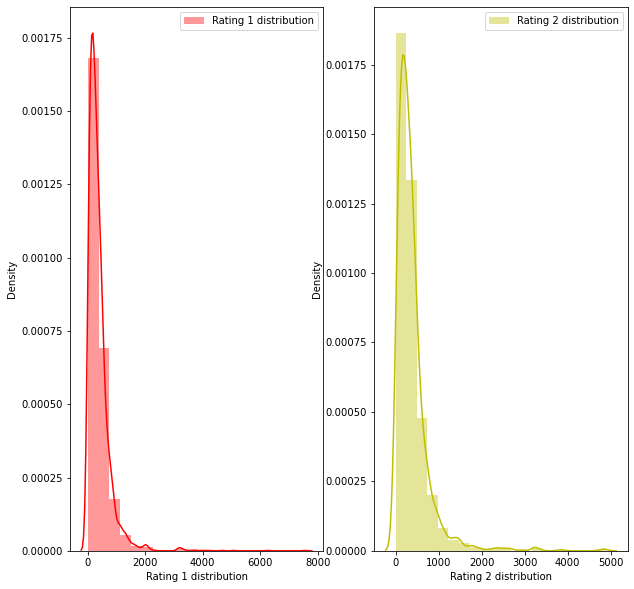

In [57]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Rating']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Rating']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

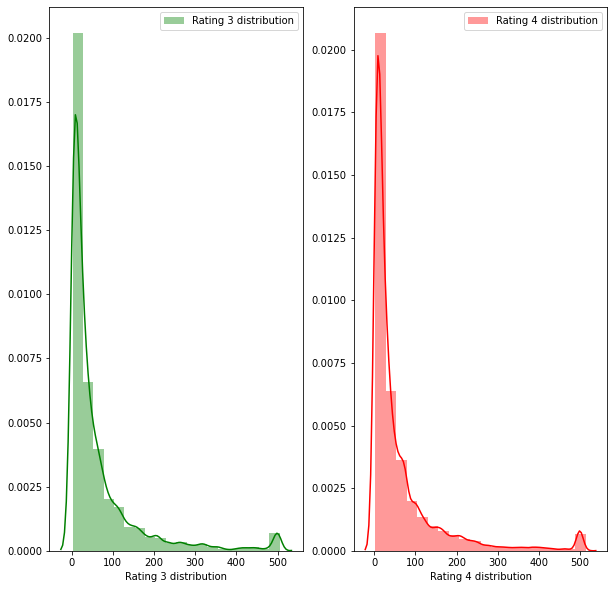

In [38]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

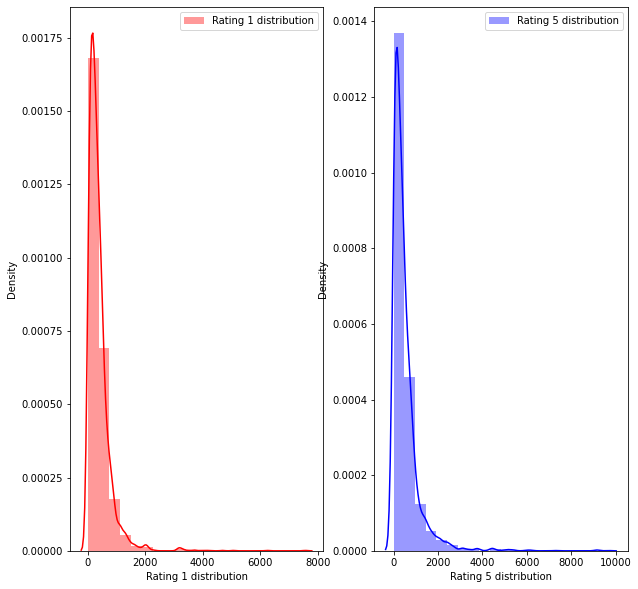

In [58]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Rating']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Rating']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

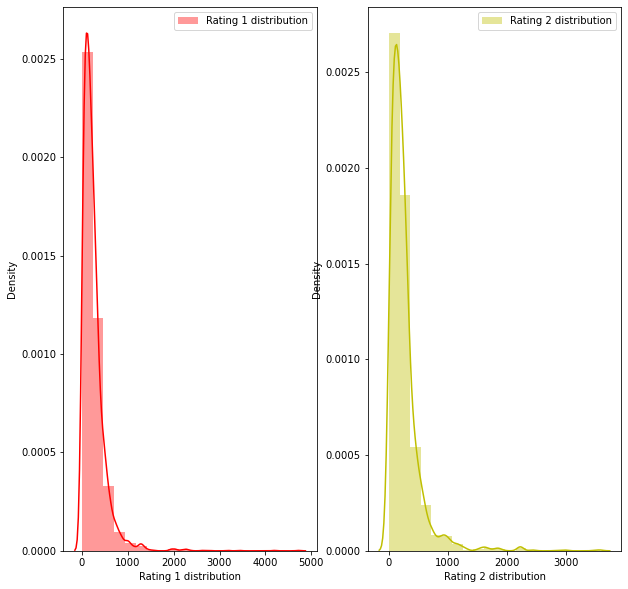

In [59]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Rating']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Rating']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

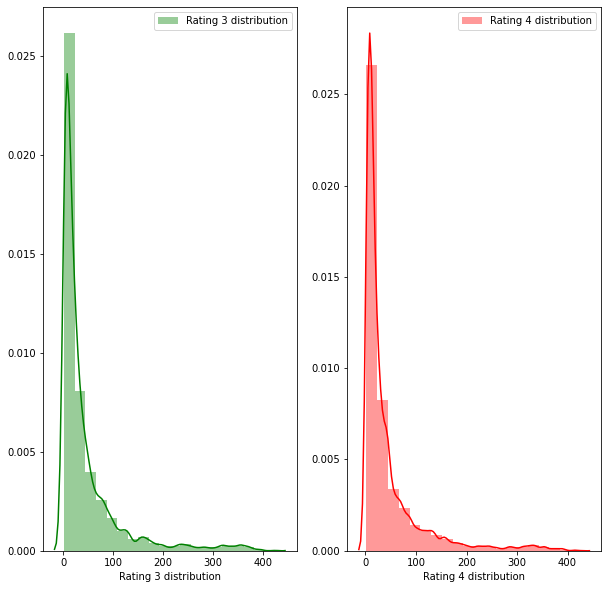

In [43]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

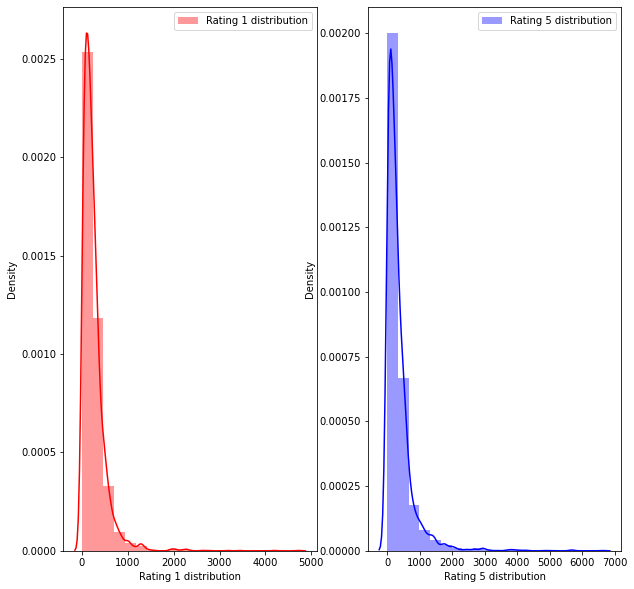

In [60]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Rating']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Rating']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

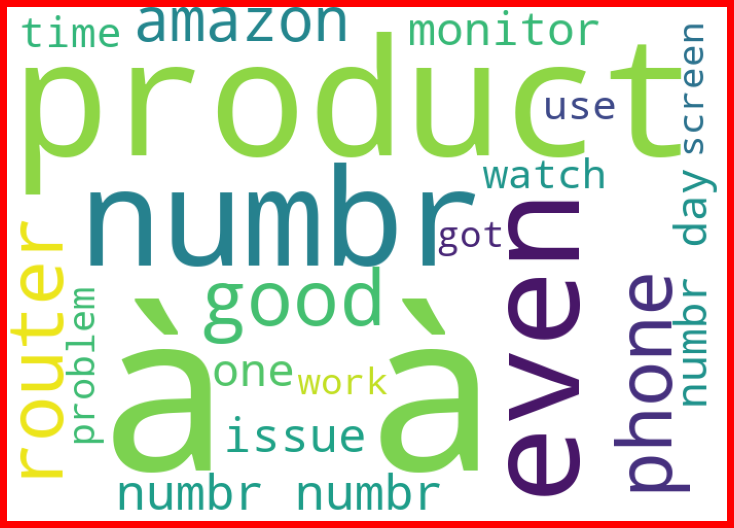

In [61]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud

Rating1=Rating['Review'][Rating['Rating']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

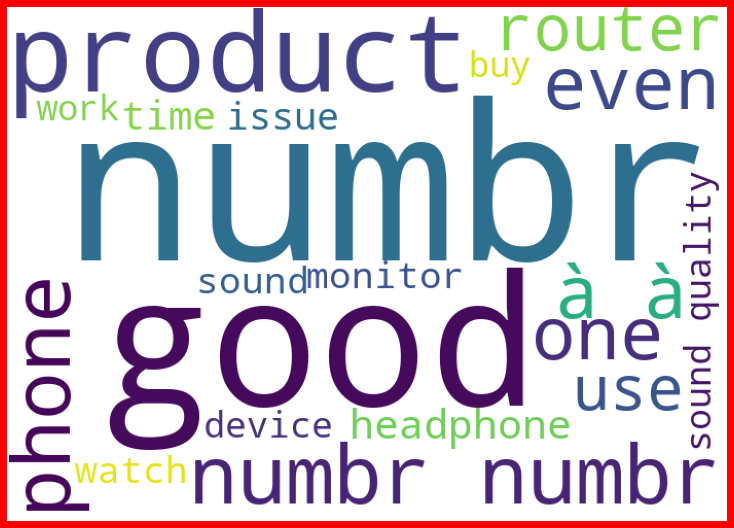

In [62]:
#getting sense of review Loud words in Rating 2

Rating2=Rating['Review'][Rating['Rating']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

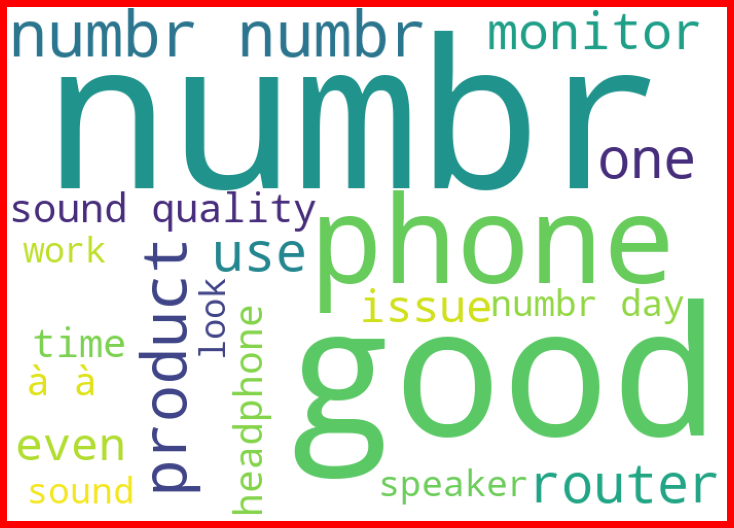

In [63]:
#getting sense of review Loud words in Rating 3

Rating3=Rating['Review'][Rating['Rating']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

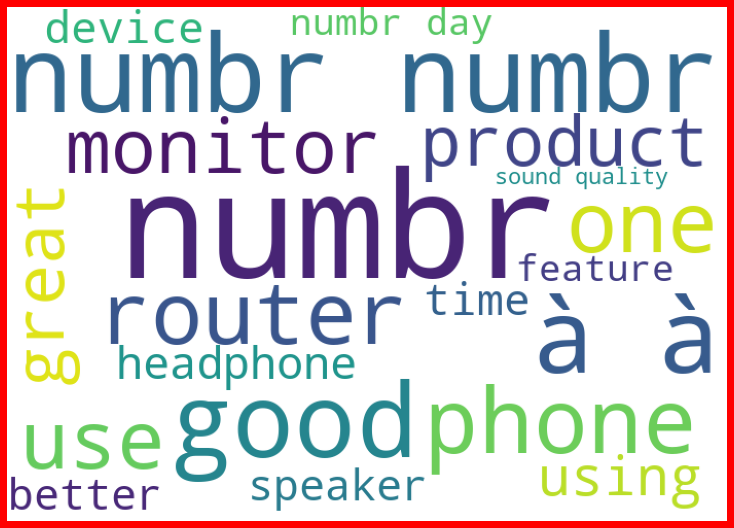

In [64]:
#getting sense of review Loud words in Rating 4

Rating4=Rating['Review'][Rating['Rating']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

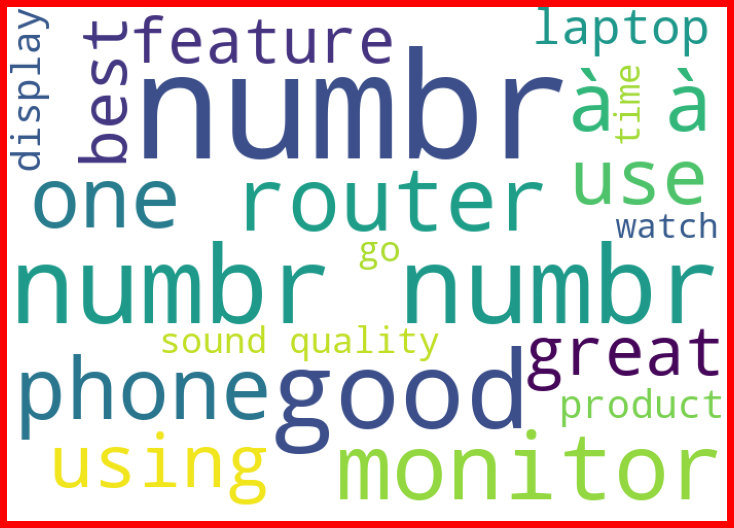

In [65]:
#getting sense of review Loud words in Rating 5

Rating5=Rating['Review'][Rating['Rating']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [67]:
for i in range(len(Rating["Review"])):
    Rating["Review"][i] = Rating["Title"][i]+ " "+ Rating["Review"][i]

In [69]:
Rating.drop(columns=["Title"],inplace=True)
Rating

,Product type,Review,Rating,length,clean_length
0,Smart Phone,Best phone but ( Prime member got 1000 loss) p...,5,242,190
1,Smart watch,Superb and amazing product. Just go for it. bo...,5,2363,1770
2,Smart watch,SMART PURCHASE likes numbr improved built qual...,5,777,680
3,Smart watch,satisfied! great band with so many features. w...,5,1436,943
4,Smart watch,"A great, cheap fitness tracker device thinner ...",5,888,519
...,...,...,...,...,...
21921,Home theater,"within few months got issue, and worst service...",1,445,351
21922,Home theater,Bass is very low. Box vibration and cracking n...,1,287,177
21923,Home theater,Other products compair than high price and low...,1,522,376
21924,Home theater,This is not good quality speaker good quality ...,1,109,66


In [71]:
#Removing Product type column as it is not required
Rating.drop(columns=["Product type"],inplace=True)
Rating.head()

,Review,Rating,length,clean_length
0,Best phone but ( Prime member got 1000 loss) p...,5,242,190
1,Superb and amazing product. Just go for it. bo...,5,2363,1770
2,SMART PURCHASE likes numbr improved built qual...,5,777,680
3,satisfied! great band with so many features. w...,5,1436,943
4,"A great, cheap fitness tracker device thinner ...",5,888,519


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Review'])

In [73]:
x=feature1

In [86]:
y=Rating['Rating']

In [87]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [98]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [99]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [100]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

In [101]:
import warnings
warnings.filterwarnings('ignore')

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.493844049247606


Cross_Val_Score =  nan


classification_report
               precision    recall  f1-score   support

           1       0.86      0.24      0.37       949
           2       0.62      0.62      0.62       760
           3       0.63      0.62      0.62       833
           4       0.32      0.82      0.46       891
           5       0.86      0.24      0.37       953

    accuracy                           0.49      4386
   macro avg       0.66      0.51      0.49      4386
weighted avg       0.66      0.49      0.48      4386



[[224 109  76 537   3]
 [ 17 470  83 188   2]
 [  8  96 517 204   8]
 [  4  58  78 727  24]
 [  6  30  72 617 228]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier ********************************

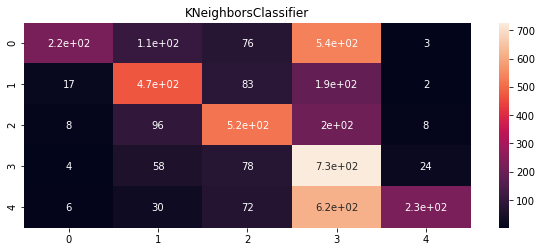

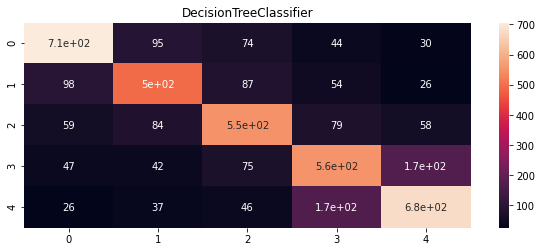

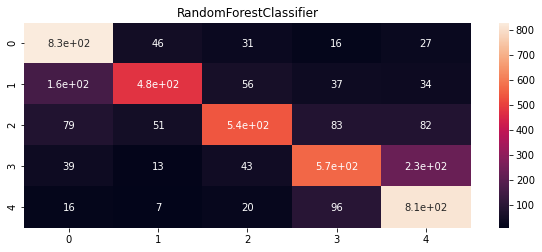

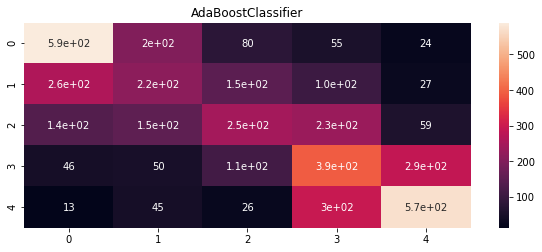

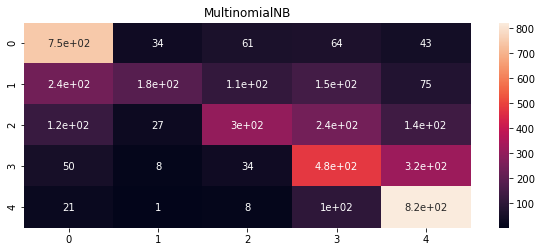

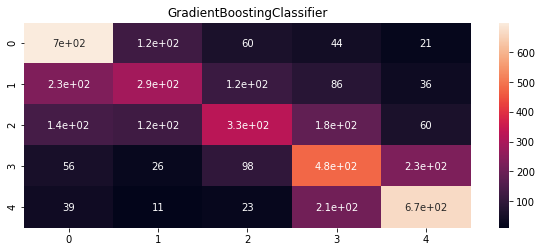

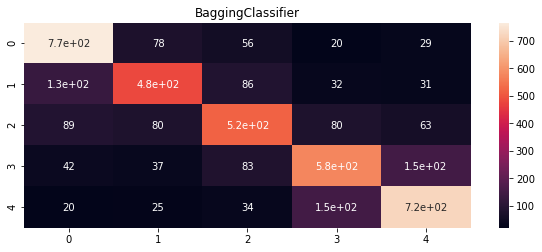

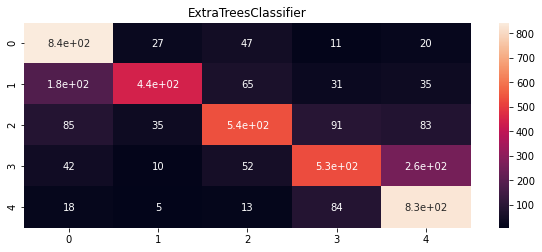

In [102]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print("Cross_Val_Score = ",sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [104]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score})
result

,Model,Accuracy_score
0,KNeighborsClassifier,49.384405
1,DecisionTreeClassifier,68.080255
2,RandomForestClassifier,73.552212
3,AdaBoostClassifier,46.055632
4,MultinomialNB,57.843137
5,GradientBoostingClassifier,56.201550
6,BaggingClassifier,70.041040
7,ExtraTreesClassifier,72.777018


# Hyperparameter Tuning using GridSearch CV

In [115]:
#Importing Libraries for GridSearchCV
from sklearn.model_selection import GridSearchCV
def gscv(mod,parameters,scoring):
    modgv = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,refit=True,n_jobs=-1)
    modgv.fit(x,y)
    print("After using GridsearchCV ",modgv.best_params_)
    print("Best Score after using GridSearchCV is-->",modgv.best_score_)

In [118]:
# Using GridSearchCv for RandomForest Classifier
rfc=RandomForestClassifier()
parameters={'n_estimators': [100,200,300,1000],'max_depth': [50, 100],'min_samples_split': [4, 6, 8],
          'min_samples_leaf': [1, 2, 3]}
gscv(rfc,parameters,'accuracy')

Fitting 5 folds for each of 72 candidates, totalling 360 fits


ValueError: Unknown label type: 'unknown'

In [108]:
#RandomForesetClassifier with best parameters found after hyperparameter tuning using gridsearch CV
rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.6716826265389877
[[839  33  34  14  29]
 [269 312  80  39  60]
 [139  31 456  88 119]
 [ 55   6  47 487 296]
 [ 27   3  14  57 852]]
              precision    recall  f1-score   support

           1       0.63      0.88      0.74       949
           2       0.81      0.41      0.54       760
           3       0.72      0.55      0.62       833
           4       0.71      0.55      0.62       891
           5       0.63      0.89      0.74       953

    accuracy                           0.67      4386
   macro avg       0.70      0.66      0.65      4386
weighted avg       0.70      0.67      0.66      4386



In [109]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score})
result

,Model,Accuracy_score
0,KNeighborsClassifier,49.384405
1,DecisionTreeClassifier,68.080255
2,RandomForestClassifier,73.552212
3,AdaBoostClassifier,46.055632
4,MultinomialNB,57.843137
5,GradientBoostingClassifier,56.201550
6,BaggingClassifier,70.041040
7,ExtraTreesClassifier,72.777018


## Random forest classifier is giving  best results so we are implementing this model in our project.

In [110]:
#saving our model
import joblib
joblib.dump(rfc,'Ratings_Prediction.pkl')

['Ratings_Prediction.pkl']

# Loading the saved model

In [111]:
model=joblib.load('Ratings_Prediction.pkl')
model

RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=1000)

In [112]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[5 2 1 2 1 4 1 1 3 5 4 5 3 5 5 3 1 2 5 1 2 3 1 3 4 5 3 3 1 5 1 5 5 2 1 2 5
 1 1 1 5 5 5 2 1 4 5 5 4 4 2 4 1 5 4 1 1 5 1 1 5 1 1 5 5 5 4 1 5 3 4 5 3 4
 1 4 5 4 1 5 5 1 5 5 1 5 5 3 1 5 5 3 1 5 2 5 5 3 4 3 1 2 1 5 5 2 4 2 1 5 5
 4 1 3 4 5 5 1 5 1 1 3 3 4 1 3 1 4 4 5 2 4 4 5 2 4 3 4 1 2 5 4 3 1 1 1 1 1
 5 5 5 3 3 3 3 1 1 5 3 2 1 5 4 1 4 5 1 4 3 2 4 1 4 5 4 5 1 5 4 4 4 1 1 5 1
 1 5 2 1 1 1 4 1 5 4 5 5 4 4 1 5 5 5 2 5 5 4 4 1 1 5 5 1 2 1 1 1 2 1 1 5 1
 3 3 3 3 3 4 5 5 5 5 2 2 3 1 2 5 5 3 4 2 5 3 4 1 1 1 1 1 3 5 3 5 1 3 5 3 1
 1 4 5 5 3 4 2 3 2 1 5 4 5 1 4 5 1 3 5 5 2 5 1 4 1 5 1 1 1 4 2 1 4 5 2 5 3
 4 4 4 3 1 4 5 1 5 3 3 5 1 1 5 4 5 5 1 4 4 1 1 2 2 1 2 3 1 5 1 5 2 1 3 3 1
 5 1 5 5 5 5 3 1 1 3 4 1 2 5 2 5 1 1 5 1 1 1 4 5 1 1 3 3 4 1 2 3 1 4 1 3 5
 5 4 1 5 5 4 4 5 1 5 1 5 1 5 5 5 5 1 1 4 1 4 4 5 1 5 4 3 2 1 2 2 5 1 5 1 5
 1 1 5 5 1 4 5 1 1 5 1 1 5 5 1 3 5 1 5 1 3 5 5 3 5 1 2 2 1 5 5 1 1 5 1 1 1
 4 1 3 1 5 4 4 5 5 4 2 2 3 5 5 1 1 5 5 5 1 5 3 5 1 2 5 4 2 5 1 1 1 1 5 3 2
 1 5 4 4 4 2 5 1 5 4 3 5 

Result is OK as per our model.

# ||HAPPY ENDING||